# 📓 Chapter 13 Notebook  
## MRI (Magnetic Resonance Imaging)  
### *Spins, Relaxation, and Image Contrast*  

This notebook is written for **students with no programming background**.  
Most cells are “change a number → run → interpret.”  
Optional **advanced** cells (animations / interactive sliders) are pre-filled.


---
## 🧠 Learning Goals

By the end of this notebook, you will be able to:

- Compute the **Larmor frequency** for a given magnetic field strength
- Visualize **spin precession** as a rotating vector
- Simulate **T1 recovery** and **T2 decay**
- Predict how **TR and TE** change contrast (T1-weighted vs T2-weighted)
- Model simple MRI signal differences for **white matter, gray matter, and CSF**
- Explore (qualitatively) how **field strength** can impact signal properties


---
## ✅ Setup (run once)

If you see missing package errors, run the install cell once and restart the kernel.


In [ ]:
%pip install matplotlib numpy ipywidgets

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

---
## 🧲 Part 1 — Larmor Precession: “How fast do spins rotate?”

In a static magnetic field $B_0$, nuclear spins precess at the **Larmor frequency**:

$$
\omega_0 = \gamma B_0
\qquad \text{and} \qquad
f_0 = \frac{\omega_0}{2\pi} = \frac{\gamma}{2\pi} B_0
$$

For **hydrogen** (the main source of MRI signal), a convenient approximation is:

$$
f_0 \approx 42.58 \,\text{MHz/T} \times B_0
$$

So at 3T, $f_0$ is about $127.7$ MHz.


In [2]:
# Larmor frequency calculator for hydrogen (proton)
gamma_over_2pi_MHz_T = 42.58  # MHz/T

B0_T = 3.0  # Tesla
f0_MHz = gamma_over_2pi_MHz_T * B0_T
f0_MHz

127.74

### Try this
Change `B0_T` to 1.5, 3.0, 7.0.  
How does resonance frequency scale with field strength?


---
## 🌀 Part 2 — Visualizing a Precessing Spin Vector (2D view)

We’ll draw the **transverse magnetization** as a vector rotating in the x–y plane.

This is not showing billions of individual spins — it’s the **net magnetization**.


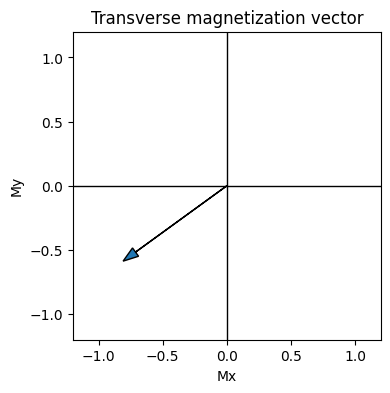

In [3]:
# A simple precession visualization (static plot at one time)
import numpy as np
import matplotlib.pyplot as plt

f = 5   # Hz (slow for visualization; MRI is MHz)
t = 0.12
phi = 2*np.pi*f*t

Mx = np.cos(phi)
My = np.sin(phi)

plt.figure(figsize=(4,4))
plt.arrow(0, 0, Mx, My, head_width=0.08, length_includes_head=True)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.axhline(0, color='k', linewidth=1)
plt.axvline(0, color='k', linewidth=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("Mx")
plt.ylabel("My")
plt.title("Transverse magnetization vector")
plt.show()

---
## ⭐ Optional: Spin Precession Animation (pre-filled)

This creates an animation of a rotating transverse magnetization vector.  
If the animation does not render in your environment, you can skip this section.


In [4]:
# Optional: precession animation
import numpy as np
import matplotlib.pyplot as plt

try:
    from matplotlib.animation import FuncAnimation
    from IPython.display import HTML
except Exception as e:
    print("Animation tools not available. You can skip this section.")
    print("Error:", e)

f = 2.0  # Hz (slow for visualization)
fig, ax = plt.subplots(figsize=(4,4))
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.axhline(0, color='k', linewidth=1)
ax.axvline(0, color='k', linewidth=1)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel("Mx")
ax.set_ylabel("My")
ax.set_title("Spin precession (transverse plane)")
line = ax.arrow(0,0,1,0, head_width=0.08, length_includes_head=True)

def update(frame):
    global line
    # remove previous arrow and redraw
    line.remove()
    t = frame/30.0
    phi = 2*np.pi*f*t
    Mx, My = np.cos(phi), np.sin(phi)
    line = ax.arrow(0,0,Mx,My, head_width=0.08, length_includes_head=True)
    return (line,)

try:
    ani = FuncAnimation(fig, update, frames=180, interval=30, blit=False)
    plt.close(fig)
    HTML(ani.to_jshtml())
except Exception as e:
    print("Could not render animation inline. That's okay—skip this section.")
    print("Error:", e)

---
## ⏳ Part 3 — T1 Relaxation (Longitudinal Recovery)

After an RF pulse tips magnetization away from the z-axis, longitudinal magnetization recovers toward equilibrium:

$$
M_z(t) = M_0\left(1 - e^{-t/T_1}\right)
$$

- T1 is the **longitudinal relaxation time**
- Bigger T1 → slower recovery


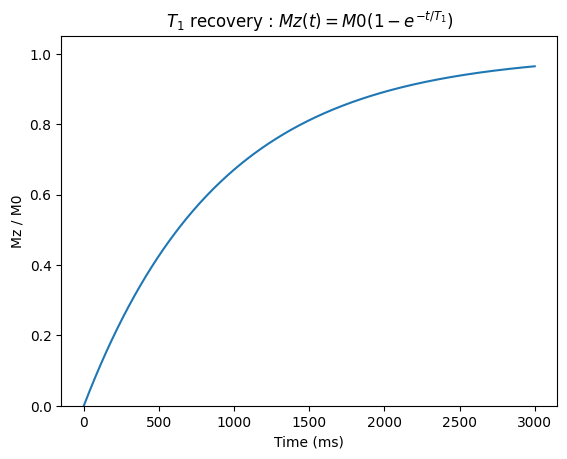

In [ ]:
# T1 recovery curve
M0 = 1.0
T1_ms = 900   # ms
t_ms = np.linspace(0, 3000, 400)

Mz = M0 * (1 - np.exp(-t_ms/T1_ms))

plt.plot(t_ms, Mz)
plt.xlabel("Time (ms)")
plt.ylabel("Mz / M0")
plt.title("T1 recovery : $Mz(t) = M0(1 - e^{-t/T_1})$")
plt.ylim(0, 1.05)
plt.show()

### Try this
Change `T1_ms` to 400, 900, 2000 ms.  
Which tissues might have longer T1 (hint: “more free water”)?


---
## ⏳ Part 4 — T2 Relaxation (Transverse Decay)

Transverse magnetization decays as spins dephase:

$$
M_{xy}(t) = M_{xy}(0)\, e^{-t/T_2}
$$

- $T_2$ is the **transverse relaxation time**
- Bigger $T_2$ → slower signal decay


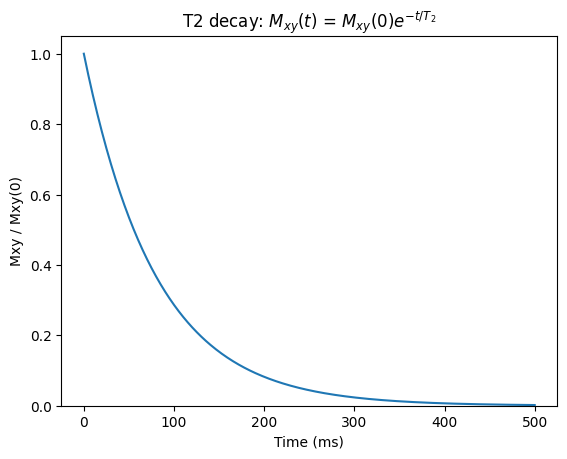

In [15]:
# T2 decay curve
Mxy0 = 1.0
T2_ms = 80
t_ms = np.linspace(0, 500, 400)

Mxy = Mxy0 * np.exp(-t_ms/T2_ms)

plt.plot(t_ms, Mxy)
plt.xlabel("Time (ms)")
plt.ylabel("Mxy / Mxy(0)")
plt.title("T2 decay: $M_{xy}(t)$ = $M_{xy}(0) e^{-t/T_2}$")
plt.ylim(0, 1.05)
plt.show()

### Try this
Change `T2_ms` to 50, 80, 200 ms.  
Which tissues might have longer T2 (again: “more free water”)?


---
## 🧠 Part 5 — MRI Contrast from $T_1$ and $T_2$ (Simple Spin-Echo Model)

A useful (simplified) signal model for a **spin-echo** image is:

$$
S \propto \left(1 - e^{-TR/T_1}\right)\, e^{-TE/T_2}
$$

Where:
- **TR** (repetition time) controls $T_1$ weighting
- **TE** (echo time) controls T2 weighting

Below is an illustrative set of relaxation values (typical order of magnitude; can vary by field strength and sequence):
- White matter (WM): shorter T1, shorter $T_2$  
- Gray matter (GM): intermediate  
- CSF: long $T_1$, long $T_2$


In [ ]:
# Illustrative tissue relaxation values (ms)
tissues = {
    "White matter": {"T1": 800,  "T2": 70},
    "Gray matter":  {"T1": 1200, "T2": 90},
    "CSF":          {"T1": 4000, "T2": 2000},
}

TR = 600   # ms
TE = 15    # ms

def spin_echo_signal(T1, T2, TR, TE):
    return (1 - np.exp(-TR/T1)) * np.exp(-TE/T2)

for name, p in tissues.items():
    S = spin_echo_signal(p["T1"], p["T2"], TR, TE)
    print(f"{name:12s}: S ~ {S:.3f}")

White matter: S ~ 0.426
Gray matter : S ~ 0.333
CSF         : S ~ 0.138


### Try this
Try two classic settings:

**$T_1$-weighted-ish:** short TR, short TE (e.g., TR=500–800 ms, TE=10–20 ms)  
**T2-weighted-ish:** long TR, long TE (e.g., TR=2000–4000 ms, TE=80–120 ms)  

Change `TR` and `TE` and re-run.  
Which tissue becomes brightest?


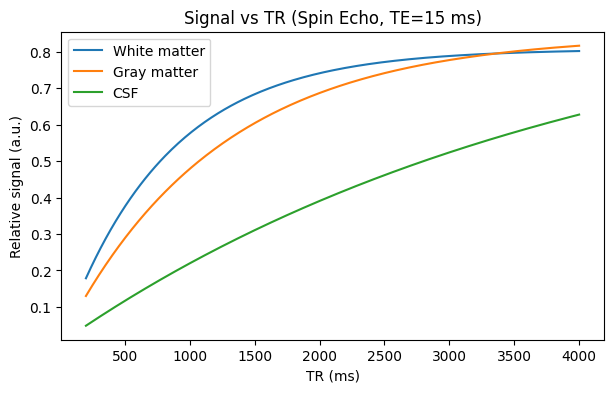

In [ ]:
# Plot signal vs TR for different tissues (fixed TE)
TE = 15
TRs = np.linspace(200, 4000, 300)

plt.figure(figsize=(7,4))
for name, p in tissues.items():
    S = spin_echo_signal(p["T1"], p["T2"], TRs, TE)
    plt.plot(TRs, S, label=name)

plt.xlabel("TR (ms)")
plt.ylabel("Relative signal (a.u.)")
plt.title(f"Signal vs TR (Spin Echo, TE={TE} ms)")
plt.legend()
plt.show()

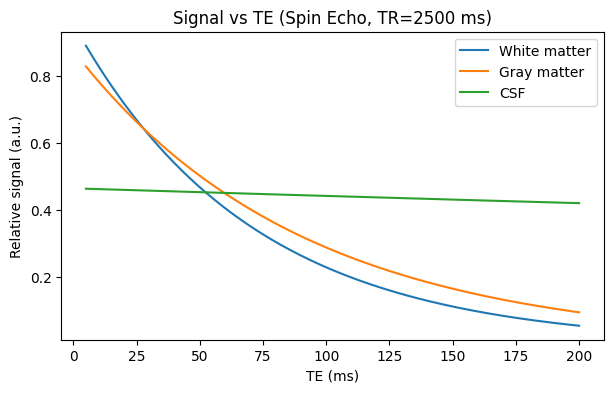

In [18]:
# Plot signal vs TE for different tissues (fixed TR)
TR = 2500
TEs = np.linspace(5, 200, 300)

plt.figure(figsize=(7,4))
for name, p in tissues.items():
    S = spin_echo_signal(p["$T_1$"], p["T2"], TR, TEs)
    plt.plot(TEs, S, label=name)

plt.xlabel("TE (ms)")
plt.ylabel("Relative signal (a.u.)")
plt.title(f"Signal vs TE (Spin Echo, TR={TR} ms)")
plt.legend()
plt.show()

---
## 🖼️ Part 6 — A Tiny “Image Contrast” Simulation (Toy Phantom)

We’ll build a simple 2D “phantom” with regions representing WM, GM, and CSF.
Then we’ll compute a signal intensity at each pixel using the spin-echo model.

This is not a full MRI simulator (no k-space, no coils) — it's a **contrast intuition tool**.


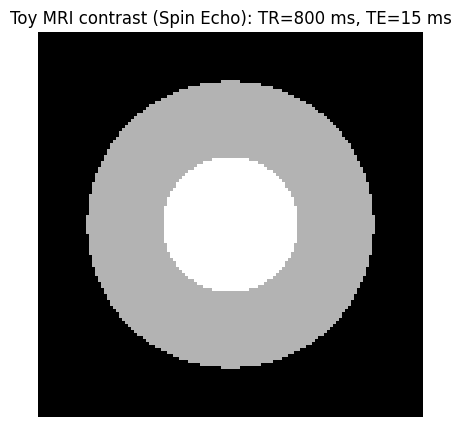

In [19]:
# Build a toy phantom: WM core, GM ring, CSF outside
N = 128
yy, xx = np.mgrid[-1:1:complex(0,N), -1:1:complex(0,N)]
r = np.sqrt(xx**2 + yy**2)

labels = np.zeros((N,N), dtype=int)
# 0 = CSF, 1 = GM, 2 = WM
labels[r < 0.75] = 1
labels[r < 0.35] = 2

TR = 800
TE = 15

signal = np.zeros((N,N), dtype=float)
for name, p in tissues.items():
    pass

# Assign tissue parameters
T1_map = np.where(labels==2, tissues["White matter"]["T1"],
         np.where(labels==1, tissues["Gray matter"]["T1"], tissues["CSF"]["T1"]))
T2_map = np.where(labels==2, tissues["White matter"]["T2"],
         np.where(labels==1, tissues["Gray matter"]["T2"], tissues["CSF"]["T2"]))

signal = (1 - np.exp(-TR/T1_map)) * np.exp(-TE/T2_map)

plt.figure(figsize=(5,5))
plt.imshow(signal, cmap='gray')
plt.title(f"Toy MRI contrast (Spin Echo): TR={TR} ms, TE={TE} ms")
plt.axis('off')
plt.show()

### Try this
Change `TR` and `TE` in the cell above:
- Make it more **$T_1$-weighted** (short TR, short TE)
- Make it more **$T_2$-weighted** (long TR, long TE)

Watch how WM/GM/CSF brightness relationships change.


---
## 🧪 Part 7 — Field Strength (B0) and Signal Properties (Qualitative)

Two key field-strength intuitions:

1) **Larmor frequency increases linearly** with $B_0$.  
2) In many tissues, **$T_1$ tends to increase with field strength** (recovery gets slower).  
   (Exact values depend on tissue and sequence.)

Below we build a *toy model* where $T_1$ increases with $B_0$ to show the **direction** of the effect on contrast.


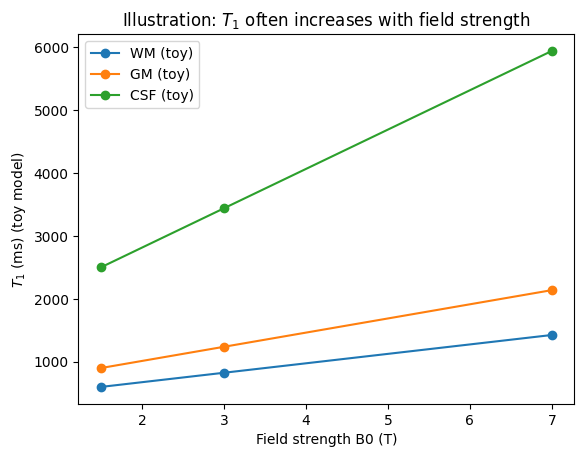

In [22]:
# Toy model: T1 increases with B0 (illustrative only)
def toy_T1_at_B0(T1_at_1p5T, B0):
    # simple scaling; not a real law
    return T1_at_1p5T * (1 + 0.25*(B0-1.5))

B0_values = np.array([1.5, 3.0, 7.0])
T1_WM = [toy_T1_at_B0(600, b) for b in B0_values]
T1_GM = [toy_T1_at_B0(900, b) for b in B0_values]
T1_CSF = [toy_T1_at_B0(2500, b) for b in B0_values]

plt.plot(B0_values, T1_WM, marker='o', label="WM (toy)")
plt.plot(B0_values, T1_GM, marker='o', label="GM (toy)")
plt.plot(B0_values, T1_CSF, marker='o', label="CSF (toy)")
plt.xlabel("Field strength B0 (T)")
plt.ylabel("$T_1$ (ms) (toy model)")
plt.title("Illustration: $T_1$ often increases with field strength")
plt.legend()
plt.show()

This is a **directional** demonstration: do not treat these numbers as precise.
The key point is that changing B0 can change $T_1$ values, which changes how TR/TE produce contrast.


---
## ⭐ Optional: Interactive MRI Contrast Explorer (pre-filled)

If sliders work in your environment, this lets you adjust:
- TR and TE and see tissue signals
- B0 and see Larmor frequency

If sliders don’t work, you can skip.


In [23]:
import numpy as np
import math

try:
    from ipywidgets import interact, IntSlider, FloatSlider
except Exception as e:
    print("ipywidgets not available. You can skip this section.")
    print("Error:", e)

tissues = {
    "White matter": {"T1": 800,  "T2": 70},
    "Gray matter":  {"T1": 1200, "T2": 90},
    "CSF":          {"T1": 4000, "T2": 2000},
}

def spin_echo_signal(T1, T2, TR, TE):
    return (1 - np.exp(-TR/T1)) * np.exp(-TE/T2)

def mri_explorer(TR=800, TE=15, B0_T=3.0):
    # tissue signals
    out = []
    for name, p in tissues.items():
        S = spin_echo_signal(p["T1"], p["T2"], TR, TE)
        out.append((name, S))
    # sort by brightness
    out = sorted(out, key=lambda x: x[1], reverse=True)

    gamma_over_2pi_MHz_T = 42.58
    f0 = gamma_over_2pi_MHz_T * B0_T

    print(f"B0 = {B0_T:.1f} T → Larmor frequency ≈ {f0:.1f} MHz")
    print(f"Spin Echo signals (relative): TR={TR} ms, TE={TE} ms")
    for name, S in out:
        print(f"  {name:12s}: {S:.3f}")

try:
    interact(
        mri_explorer,
        TR=IntSlider(min=200, max=5000, step=50, value=800, description="TR (ms)"),
        TE=IntSlider(min=5, max=200, step=5, value=15, description="TE (ms)"),
        B0_T=FloatSlider(min=0.5, max=7.0, step=0.5, value=3.0, description="B0 (T)")
    )
except Exception as e:
    print("Interactive display not available here. That's okay—skip this section.")
    print("Error:", e)

interactive(children=(IntSlider(value=800, description='TR (ms)', max=5000, min=200, step=50), IntSlider(value…

---
## 🧠 Big Picture Takeaways

- Hydrogen spins precess at the **Larmor frequency** $f_0 \propto B_0$  
- RF excitation and precession produce a measurable MRI signal  
- **$T_1$** controls longitudinal recovery; **$T_2$** controls transverse decay  
- **TR/TE choices** turn tissue $T_1$/ $T_2$ differences into image contrast  
- Simple models can predict WM/GM/CSF brightness for $T_1$- and $T_2$-weighted scans  
- Field strength influences resonance frequency and can shift relaxation behavior

You now have the core physical intuition behind MRI contrast.
